# PHAS0030 Assignment Week 6

In this notebook we will work on the !D wabe equation and see how the system evolves when we change the value of $r$. The relevant equation being:

$$
\frac{\partial^2\theta}{\partial t^2}=c(x)^2\frac{\partial^2\theta}{\partial x^2}
$$

In order to do this we will be implementing the centred difference formula, where...

$$
\theta_{x,t+1} = 2(1 - r^2)\theta_{x,t} - \theta_{x,t-1} + r^2[\theta_{x+1,n}-\theta_{x-1,t}]
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### 1. Set up the wave equation update



In [2]:
def explicit_wave_eq_update(theta_n, theta_nm1,r):
    """
    A function for updating the value of theta in the next time step
    using a centred difference formula.
    
    Inputs:
    
    theta_n: Wave at time t_n = n*dt
    theta_nm1: Wave at time t_{n-1} = (n-1)*dt
    r: Constant (c dt/dx)
    
    Output:
    
    theta_np1: Theta at time t_{n+1} = (n+1)*dt
    """
    theta_ip1 = np.roll(theta_n, 1)
    theta_im1 = np.roll(theta_n,-1)
    theta_np1 = 2*(1-r**2)*theta_n - theta_nm1 + r**2 * (theta_ip1 + theta_im1)
    
    return theta_np1

### 2. Set up the wave, arrays and initial conditions

In [3]:
# Set up a system for a Wave:
frequency = 1 # Hertz 
wavelength = 1 # Metre
wavevector = 2*np.pi/wavelength # Wavevector
ang_freq = frequency*2*np.pi # Radians per Second
wave_velocity = frequency*wavelength # Metres per second

# Define number of points and factor r:
N = 50 #Number of points per wavelength
mult = 5 # Number of wavelengths
r = 0.3*np.ones(mult*N)

# Start and end points for change of r:
st = 2*N
en = 3*N
r[st:en] = 0.15

# Initialise
dx = wavelength/N # Spatial Step
dt = r[0]*dx/wave_velocity # Time Step
x = np.arange(0, mult*wavelength, dx) # Spatial component of wave

### 3. Run the solver, storing the results, and plot

In [4]:
t = [] # Initialise time
t.append(0) # Start time at t=0
theta_0 = np.sin(wavevector*x)

t.append(dt)
theta_t = np.sin(wavevector*x - ang_freq*dt)

# Restrict initial wave to one wavelength
theta_0[N:] = 0.0
theta_t[N+1:] = 0.0

# Run for at least 300 steps
iters = 1000 # Number of time steps
store_theta = [theta_0, theta_t] # Initialising array of theta 

for n in range(iters):
    # Using centred difference formula
    theta_n = explicit_wave_eq_update(theta_t, theta_0, r)
    
    # Updating Values
    theta_0 = theta_t
    theta_t = theta_n
    
    # Updating array of stored values
    store_theta.append(theta_n)
    
    # Updaitng time array
    t.append(t[-1] + dt)

#### 3.1 3D plot

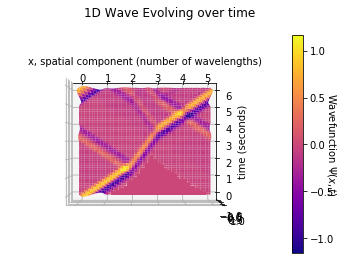

In [5]:
time = np.array(t)
store_theta_np = np.array(store_theta)
x2d,t2d = np.meshgrid(x, t)

# Plotting the wave as it evolves through time
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fig.suptitle("1D Wave Evolving over time")
ax.set_xlabel("x, spatial component (number of wavelengths)")
ax.set_ylabel("time (seconds)")
ax.view_init(90,270)
surf = ax.plot_surface(x2d, t2d, store_theta_np, cmap='plasma')
cbar = fig.colorbar(surf)
cbar.set_label(r"Wavefunction $\Psi(x,t)$", rotation=270)
plt.show()

#### 5.

As we can see above our wave starts by moving in the positive $x$ direction until it reaches a point $2\lambda$ where the value $r$ changes from $0.3$ to $0.15$ until the point $3\lambda$. We can see in the figure above that this has meant our wave is now travelling at a lowed speed then it was originally.

We also observe that the wave has now split into 2 parts at $2\lambda$. One part reflecting back in the driection the wave just came from and one continuing in the original direction.

One we reach $3\lambda$ this is where we start to see the wave return to it's original speed and also once again a reflection.

#### 3.2 2D subplots

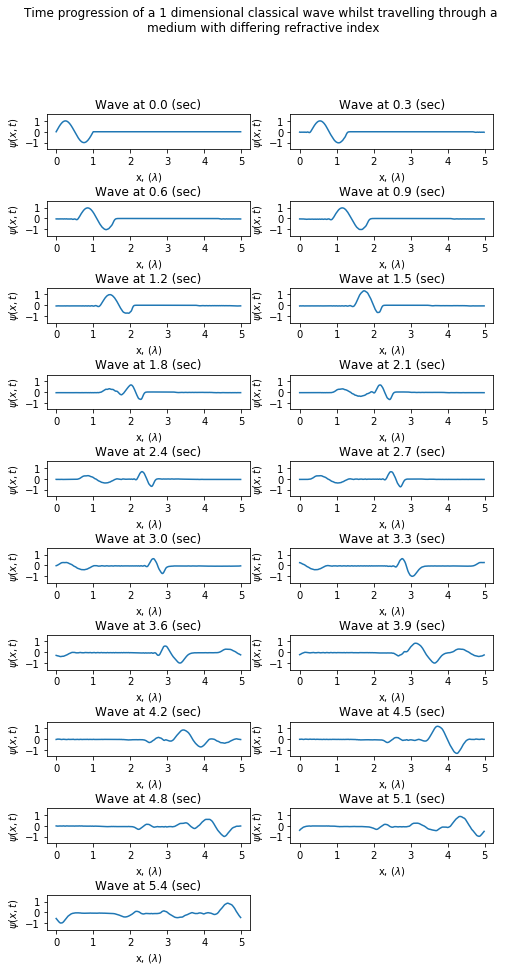

In [23]:
rows = 8
cols = 15

fig_parts = plt.figure(figsize=(rows,cols))
fig_parts.subplots_adjust(hspace=1.5)

num  = rows*cols
step = int(iters/num)
graph_number = 0
graph_jump = int(iters/20)

for i in range(1,20):
    ax = fig_parts.add_subplot(10,2,i)
    ax.plot(x, store_theta_np[graph_number])
    ax.set_xlabel(r"x, ($\lambda$)")
    ax.set_ylabel(r"$\psi(x,t)$")
    ax.set_ylim((-1.6,1.6))
    ax.set_title("Wave at " + str(round(graph_number*dt, 3)) + " (sec)")
    graph_number += graph_jump
    
fig_parts.suptitle("Time progression of a 1 dimensional classical wave whilst travelling through a \nmedium with differing refractive index")
plt.show()

I think that this type of plot is useful in observing and reviewing a wave at every time step but not at showing the physics we had discussed in the text cell above as clearly. We are able to see more clearly how the change in the value $r$ effects the actual wave but it is not as clear, for example, that their is a second reflection.

### 4. Varying refractive index

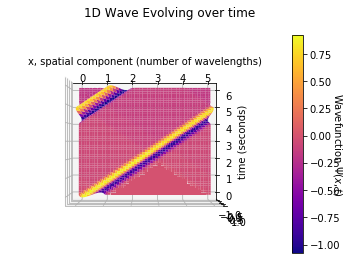

In [27]:
### COPY AND PASTED CODE FROM EARLIER EXERCISES #####
# Set up a system for a Wave:
frequency = 1 # Hertz 
wavelength = 1 # Metre
wavevector = 2*np.pi/wavelength # Wavevector
ang_freq = frequency*2*np.pi # Radians per Second
wave_velocity = frequency*wavelength # Metres per second

# Define number of points and factor r:
N = 50 #Number of points per wavelength
mult = 5 # Number of wavelengths
r = 0.3*np.ones(mult*N)
#####################################################



for x in range(2*wavelength*N, 3*wavelength*N, 1):
    x_ = x*dx
    r[x] = 0.1*(np.cos(2*np.pi*(x - 2*wavelength)/wavelength) + 2)



### COPY AND PASTED CODE FROM EARLIER EXERCISES #####
# Initialise
dx = wavelength/N # Spatial Step
dt = r[0]*dx/wave_velocity # Time Step
x = np.arange(0, mult*wavelength, dx) # Spatial component of wave

t = [] # Initialise time
t.append(0) # Start time at t=0
theta_0 = np.sin(wavevector*x)

t.append(dt)
theta_t = np.sin(wavevector*x - ang_freq*dt)

# Restrict initial wave to one wavelength
theta_0[N:] = 0.0
theta_t[N+1:] = 0.0

# Run for at least 300 steps
iters = 1000 # Number of time steps
store_theta = [theta_0, theta_t] # Initialising array of theta 

for n in range(iters):
    # Using centred difference formula
    theta_n = explicit_wave_eq_update(theta_t, theta_0, r)
    
    # Updating Values
    theta_0 = theta_t
    theta_t = theta_n
    
    # Updating array of stored values
    store_theta.append(theta_n)
    
    # Updaitng time array
    t.append(t[-1] + dt)

time = np.array(t)
store_theta_np = np.array(store_theta)
x2d,t2d = np.meshgrid(x, t)

# Plotting the wave as it evolves through time
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fig.suptitle("1D Wave Evolving over time")
ax.set_xlabel("x, spatial component (number of wavelengths)")
ax.set_ylabel("time (seconds)")
ax.view_init(90,270)
surf = ax.plot_surface(x2d, t2d, store_theta_np, cmap='plasma')
cbar = fig.colorbar(surf)
cbar.set_label(r"Wavefunction $\Psi(x,t)$", rotation=270)
plt.show()
#####################################################

It seems as though applying our change to $r$ has not made any significant difference in the wave function. I have chosen to use the 3D plotting format since in my opinion it is able to represen the wave's evolution through time in a better way then the multiple 2D plots.